# Import libraries

In [31]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from helpers import parse_variables, map_to_color
from matplotlib.colors import LinearSegmentedColormap
import importlib.util

# Create population grid

In [32]:
dict = parse_variables('geno_simulation.txt')
G = int(dict['G'])
L = int(dict['L'])
c = int(dict['c'])
k = int(dict['k'])
M = float(dict['M'])
HWE = float(dict['HWE'])

# Thresholds
very_rare_threshold_L = float(dict['very_rare_threshold_L'])
very_rare_threshold_H = float(dict['very_rare_threshold_H'])

rare_threshold_L = float(dict['rare_threshold_L'])
rare_threshold_H = float(dict['rare_threshold_H'])

common_threshold_L = float(dict['common_threshold_L'])
common_threshold_H = float(dict['common_threshold_H'])

In [33]:
number_of_snps = (G*L)/2 # one loci per chromosome
number_of_individuals = c*k*k

# load populations

In [34]:
populations = pd.read_pickle(f"data/G{G}_L{L}_c{c}_k{k}_M{M}_HWE{HWE}/phenotype/01_population_structure.pkl")
populations

,populations,x,y,z
0,pop 1,1,1,0.5
1,pop 1,1,1,0.5
2,pop 1,1,1,0.5
3,pop 1,1,1,0.5
4,pop 1,1,1,0.5
...,...,...,...,...
795,pop 16,4,4,0.5
796,pop 16,4,4,0.5
797,pop 16,4,4,0.5
798,pop 16,4,4,0.5


In [35]:
palette = [map_to_color(x, y, z, populations) for x, y, z in zip(populations['x'], populations['y'], populations['z'])]

In [36]:
# Extract integers from the 'populations' column and convert to integers
populations['population'] = populations['populations'].str.extract('(\d+)').astype(int)


In [37]:
populations["population_number"] = populations['population']/populations['population'].max()
populations

,populations,x,y,z,population,population_number
0,pop 1,1,1,0.5,1,0.0625
1,pop 1,1,1,0.5,1,0.0625
2,pop 1,1,1,0.5,1,0.0625
3,pop 1,1,1,0.5,1,0.0625
4,pop 1,1,1,0.5,1,0.0625
...,...,...,...,...,...,...
795,pop 16,4,4,0.5,16,1.0000
796,pop 16,4,4,0.5,16,1.0000
797,pop 16,4,4,0.5,16,1.0000
798,pop 16,4,4,0.5,16,1.0000


In [38]:
"""
# Check the grid
df_agg = populations.groupby(['x', 'y']).agg({'population': 'mean'}).reset_index()

# Now, pivot the aggregated DataFrame
grid_df = df_agg.pivot(index='y', columns='x', values='population')

# Use seaborn to create the heatmap
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(grid_df, cmap=palette, linewidths=.5, square=True, cbar=False)

# Add a title to the heatmap
plt.title('Population Grid', fontsize=16)
plt.gca().invert_yaxis()  # Sometimes it's necessary to invert the y-axis for correct orientation
plt.show()
"""

"\n# Check the grid\ndf_agg = populations.groupby(['x', 'y']).agg({'population': 'mean'}).reset_index()\n\n# Now, pivot the aggregated DataFrame\ngrid_df = df_agg.pivot(index='y', columns='x', values='population')\n\n# Use seaborn to create the heatmap\nplt.figure(figsize=(10, 10))\nheatmap = sns.heatmap(grid_df, cmap=palette, linewidths=.5, square=True, cbar=False)\n\n# Add a title to the heatmap\nplt.title('Population Grid', fontsize=16)\nplt.gca().invert_yaxis()  # Sometimes it's necessary to invert the y-axis for correct orientation\nplt.show()\n"

# Create and Observe PC's

In [39]:
# Standardize the data
scaler = StandardScaler()

In [40]:
very_rare = pd.read_pickle(f"data/G{G}_L{L}_c{c}_k{k}_M{M}_HWE{HWE}/genotype/02_veryrare_genotype_AF_{very_rare_threshold_L}_{very_rare_threshold_H}.pkl")
rare = pd.read_pickle(f"data/G{G}_L{L}_c{c}_k{k}_M{M}_HWE{HWE}/genotype/02_rare_genotype_AF_{rare_threshold_L}_{rare_threshold_H}.pkl")
common = pd.read_pickle(f"data/G{G}_L{L}_c{c}_k{k}_M{M}_HWE{HWE}/genotype/02_common_genotype_AF_{common_threshold_L}_{common_threshold_H}.pkl")

In [41]:
complete = pd.concat([common, rare, very_rare], axis=1)
complete = ((complete*2)-1)

In [42]:
very_rare

snps
0
1
2
3
4
...
795
796
797
798


In [43]:
scaled_complete = scaler.fit_transform(complete)
scaled_common = scaler.fit_transform(common)
try:
    scaled_rare = scaler.fit_transform(rare)
except:
    print("not in HWE")
try:
    scaled_veryrare = scaler.fit_transform(very_rare)
except:
    print("not in HWE")

not in HWE
not in HWE


In [44]:
# Apply PCA to get the first two principal components
n_components = 50
pca = PCA(n_components=n_components)
pc_labels = [f"PC{i}" for i in range(1, n_components + 1)]

PC_complete = pca.fit_transform(scaled_complete)
PC_complete = pd.DataFrame(data=PC_complete, columns=pc_labels)

PC_common = pca.fit_transform(scaled_common)
PC_common = pd.DataFrame(data=PC_common, columns=pc_labels)

try:
    PC_rare = pca.fit_transform(scaled_rare)
    PC_rare = pd.DataFrame(data=PC_rare, columns=pc_labels)
except:
    pass
try:
    PC_veryrare = pca.fit_transform(scaled_veryrare)
    PC_veryrare = pd.DataFrame(data=PC_veryrare, columns=pc_labels)
except:
    pass

In [45]:
to_have_collumns = ['populations','population_number', 'x', 'y', 'population']
PC_complete[to_have_collumns] = populations[to_have_collumns]
PC_common[to_have_collumns] = populations[to_have_collumns]
try:
    PC_rare[to_have_collumns] = populations[to_have_collumns]
except:
    pass
try:
    PC_veryrare[to_have_collumns] = populations[to_have_collumns]
except:
    pass

/tmp/ipykernel_22281/989674412.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Population', bbox_to_anchor=(1.05, 1), loc='upper left')


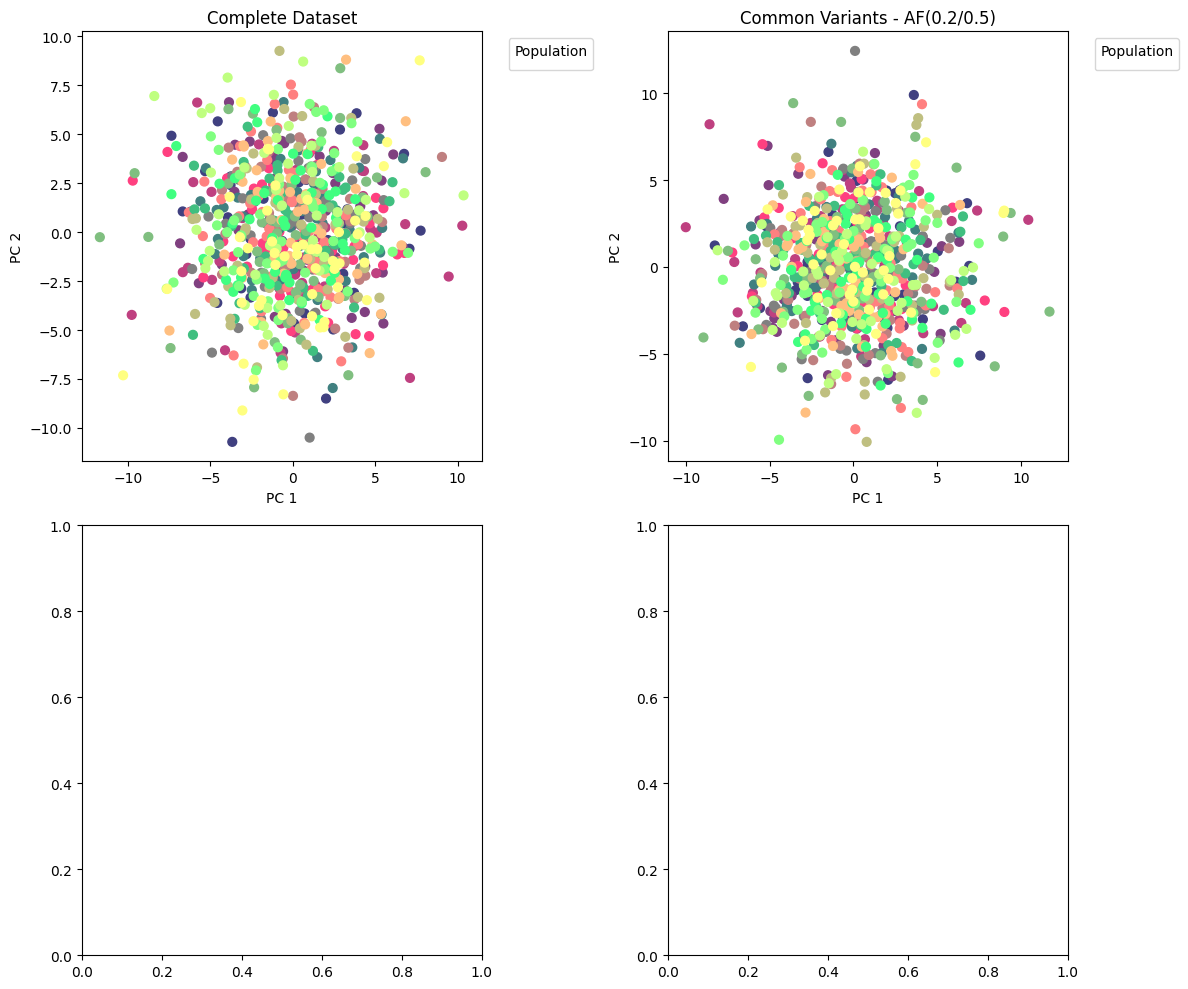

In [47]:
colors = [map_to_color(x, y, z, populations) for x, y, z in zip(populations['x'], populations['y'], populations['z'])]
# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Dataframes and corresponding titles
try:
    dataframes = [PC_complete, PC_common, PC_rare, PC_veryrare]
    titles = ['Complete Dataset', 
              f"Common Variants - AF({common_threshold_L}/{common_threshold_H})", 
              f"Rare Variants - AF({rare_threshold_L}/{rare_threshold_H})", 
              f"Vary Rare Variants - AF({very_rare_threshold_L}/{very_rare_threshold_H})"]
    
    # Iterate through dataframes, axes, and titles
    for df, ax, title in zip(dataframes, axes.flatten(), titles):
        # Count the unique values in the 'populations' column
        unique_populations = df['populations'].nunique()
        # Plotting the principal components with colors
        ax.scatter(x=df['PC1'], y=df['PC2'], c=colors, s=40)
        
        ax.set_title(title)  # Set the title for the current subplot
        ax.set_xlabel('PC 1')
        ax.set_ylabel('PC 2')
        # Only show the legend if there are 16 or fewer unique populations
        if unique_populations <= 16:
            ax.legend(title='Population', bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            ax.legend([],[], frameon=False) # This hides the legend
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plots
    plt.show()
except:
    dataframes = [PC_complete, PC_common]
    titles = ['Complete Dataset', 
              f"Common Variants - AF({common_threshold_L}/{common_threshold_H})", 
              f"Rare Variants - AF({rare_threshold_L}/{rare_threshold_H})", 
              f"Vary Rare Variants - AF({very_rare_threshold_L}/{very_rare_threshold_H})"]
    
    # Iterate through dataframes, axes, and titles
    for df, ax, title in zip(dataframes, axes.flatten(), titles):
        # Count the unique values in the 'populations' column
        unique_populations = df['populations'].nunique()
        # Plotting the principal components with colors
        ax.scatter(x=df['PC1'], y=df['PC2'], c=colors, s=40)
        
        ax.set_title(title)  # Set the title for the current subplot
        ax.set_xlabel('PC 1')
        ax.set_ylabel('PC 2')
        # Only show the legend if there are 16 or fewer unique populations
        if unique_populations <= 16:
            ax.legend(title='Population', bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            ax.legend([],[], frameon=False) # This hides the legend
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plots
    plt.show()

In [ ]:
colors = [map_to_color(x, y, z, populations) for x, y, z in zip(populations['x'], populations['y'], populations['z'])]
# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Dataframes and corresponding titles
dataframes = [PC_complete, PC_common, PC_rare, PC_veryrare]
titles = ['Complete Dataset', 
          f"Common Variants - AF({common_threshold_L}/{common_threshold_H})", 
          f"Rare Variants - AF({rare_threshold_L}/{rare_threshold_H})", 
          f"Vary Rare Variants - AF({very_rare_threshold_L}/{very_rare_threshold_H})"]

# Iterate through dataframes, axes, and titles
for df, ax, title in zip(dataframes, axes.flatten(), titles):
    # Count the unique values in the 'populations' column
    unique_populations = df['populations'].nunique()
    # Plotting the principal components with colors
    ax.scatter(x=df['PC3'], y=df['PC4'], c=colors, s=40)
    
    ax.set_title(title)  # Set the title for the current subplot
    ax.set_xlabel('PC 3')
    ax.set_ylabel('PC 4')
    # Only show the legend if there are 16 or fewer unique populations
    if unique_populations <= 16:
        ax.legend(title='Population', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        ax.legend([],[], frameon=False) # This hides the legend

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Save PCs

In [ ]:
os.makedirs(f"data/G{G}_L{L}_c{c}_k{k}_M{M}_HWE{HWE}/phenotype/PCs",exist_ok = True)

In [ ]:
PC_complete.to_pickle(f"data/G{G}_L{L}_c{c}_k{k}_M{M}_HWE{HWE}/phenotype/PCs/complete_genotypes_AF_0_0.5_.pkl")
PC_veryrare.to_pickle(f"data/G{G}_L{L}_c{c}_k{k}_M{M}_HWE{HWE}/phenotype/PCs/veryrare_genotype_AF_{very_rare_threshold_L}_{very_rare_threshold_H}.pkl")
PC_rare.to_pickle(f"data/G{G}_L{L}_c{c}_k{k}_M{M}_HWE{HWE}/phenotype/PCs/rare_genotype_AF_{rare_threshold_L}_{rare_threshold_H}.pkl")
PC_common.to_pickle(f"data/G{G}_L{L}_c{c}_k{k}_M{M}_HWE{HWE}/phenotype/PCs/common_genotype_AF_{common_threshold_L}_{common_threshold_H}.pkl")